# Estimating Long-Term Runoff using Regional Regression

Water Survey of Canada is the government organization that maintains a nation-wide network of streamflow monitoring stations.  There are roughly 2100 active monitoring stations in Canada, and while this is a large number, it is small in comparison to the number of streams and rivers, and the distribution of stations is biased to developed areas.

![Active Hydrometric Monitoring Stations in Canada](img/CAN_network_map.png)
>Realtime flow monitoring (source: Hamilton, Stuart. (0002). Winter Hydrometry: Real-Time Data Issues.

In addition to the active stations, there are roughly 6000 inactive stations where historical data can be drawn from.  This data is free, and openly available to the public through [Environment Canada's Datamart web portal](https://wateroffice.ec.gc.ca/mainmenu/real_time_data_index_e.html).

Open the datamart in a new window and go to the **Map Search**.  Choose BC as the "Province or Territory" and click on **"Go"**.  A map view of hydrometric stations in BC will render in your browser.  

Zoom into the region east of Vancouver, in the region of Harrison Lake, as shown below.  There are two stars drawn (excellently) on the map indicating locations we're interested in for run-of-river hydro.  

In order to figure out how much water we might expect in the basins where the stars are drawn, we need to look at long-term measured records in the nearby area.  

![Map of active stations near Harrison Lake](img/harrison_lake_map1.png)
>Map of active stations near Harrison Lake (source: Water Survey of Canada)

Using the map view, retrieve the station ID numbers and store them as **strings** in different variables.  i.e.:

`stn1 = '08EA004'`  <-- here the single quote `'` surrounding a group of characters makes a string.

In [1]:
# find the three station numbers and store them in three variables
stn1 = '' 
stn2 = ''
stn3 = ''

Below we are going to access daily flows for these stations directly from Datamart.

**Note**: Datamart is for realtime and recent data.  You can find long-ter records for these stations using the [BC Water Tool](https://kwt.bcwatertool.ca/streamflow).

In [ ]:
# you can get daily data for the last month
datamart_link_daily = 'https://dd.weather.gc.ca/hydrometric/csv/BC/daily/'
# you can also get hourly data for the latest 24 hours
datamart_link_daily = 'https://dd.weather.gc.ca/hydrometric/csv/BC/daily/'

In [25]:
# pandas is a library for manipulating large amounts of data,
# sort of like Excel without a user interface.
import pandas as pd

stn1 = '08MG001'
filename = f'BC_{stn1}_daily_hydrometric.csv'

# import the data for the first station
df1 = pd.read_csv(datamart_link + filename, 
                  parse_dates=['Date'], index_col='Date',
                 infer_datetime_format=True)
# the 'head' command shows a preview of the data we've downloaded
df1.head()

,ID,Water Level / Niveau d'eau (m),Grade,Symbol / Symbole,QA/QC,Discharge / Débit (cms),Grade.1,Symbol / Symbole.1,QA/QC.1
Date,,,,,,,,,
2021-03-02 00:00:00-08:00,08MG001,9.226,NaN,NaN,1,19.1,NaN,NaN,1
2021-03-02 00:05:00-08:00,08MG001,9.226,NaN,NaN,1,19.1,NaN,NaN,1
2021-03-02 00:10:00-08:00,08MG001,9.227,NaN,NaN,1,19.2,NaN,NaN,1
2021-03-02 00:15:00-08:00,08MG001,9.227,NaN,NaN,1,19.2,NaN,NaN,1
2021-03-02 00:20:00-08:00,08MG001,9.229,NaN,NaN,1,19.3,NaN,NaN,1


We want to compare flow at the three stations.  Let's put all of the data together into one dataframe.

In [26]:
# create an empty list
all_dfs = []

stn1, stn2, stn3 = '08MH147', '08MF065', '08MG001'
# create a list of the station names
station_list = [stn1, stn2, stn3]

# loop through the filenames and store each dataframe in the list

for station in station_list:
    print(f'Downloading data for {station}...')
    filename = f'BC_{station}_daily_hydrometric.csv'
    df = pd.read_csv(datamart_link + filename, 
                  parse_dates=['Date'], index_col='Date',
                 infer_datetime_format=True)
    
    # create a short form name so we can easily index the column
    # using the station number
    df[station] = df['Discharge / Débit (cms)']
    
    # append the dataframe to the list 
    all_dfs.append(df)

In [27]:
# concatenate the list of dataframes into a single dataframe
# inner join means to keep only concurrent data (flow values on the same day)
data = pd.concat(all_dfs, join='inner', axis=1)
# keep just the flow columns
data = data[[stn1, stn2, stn3]]
data.head()

,08MH147,08MF065,08MG001
Date,,,
2021-03-02 00:00:00-08:00,6.76,7.53,19.1
2021-03-02 00:05:00-08:00,6.78,7.56,19.1
2021-03-02 00:10:00-08:00,6.78,7.50,19.2
2021-03-02 00:15:00-08:00,6.81,7.66,19.2
2021-03-02 00:20:00-08:00,6.78,7.69,19.3


<AxesSubplot:xlabel='Date'>

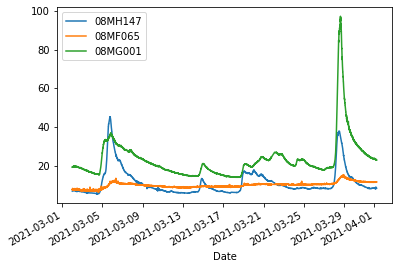

In [28]:
data.plot()

Now let's compare the three using linear regression.

[Background information on Linear Regression](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-trend-lines/a/linear-regression-review).

In [33]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# this makes the figure render within jupyter instead of a new window
output_notebook()

Loading BokehJS ...

In [36]:
p = figure(width=600, height=400, title=f'{stn1} vs. {stn2}')

p.circle(data[stn1], data[stn2])
show(p)

In [37]:
p = figure(width=600, height=400, title=f'{stn1} vs. {stn2}')

p.circle(data[stn1], data[stn3])
show(p)

In [38]:
p = figure(width=600, height=400, title=f'{stn1} vs. {stn2}')

p.circle(data[stn2], data[stn3])
show(p)

In [62]:
lt_dfs = []

for stn in station_list:
    # I saved long-term data ahead of time in the 'data/' folder
    filename = f'data/{stn}.csv'
    
    df = pd.read_csv(filename, header=13,
                  parse_dates=['Datetime'], index_col='Datetime',
                 infer_datetime_format=True)
    # how many analysis types are there?
    print(list(set(df['Analysis'])))
    
    # we want just the flow data, not stage!
    df = df[df['Analysis'] == 'Discharge (m3/s)']
    
    # 'Value' isn't really helpful, create a column using our station number
    df[stn] = df['Value']
    
    print(df.head())
    lt_dfs.append(df)

['Water Level (m)', 'Discharge (m3/s)']
                    Analysis  Value  QA  08MH147
Datetime                                        
1983-02-03  Discharge (m3/s)   6.59   1     6.59
1983-02-04  Discharge (m3/s)   6.40   1     6.40
1983-02-05  Discharge (m3/s)   5.93   1     5.93
1983-02-06  Discharge (m3/s)   6.21   1     6.21
1983-02-07  Discharge (m3/s)   7.04   1     7.04
['Water Level (m)', 'Discharge (m3/s)']
                    Analysis  Value  QA  08MF065
Datetime                                        
1973-04-20  Discharge (m3/s)   13.7   1     13.7
1973-04-21  Discharge (m3/s)   14.3   1     14.3
1973-04-22  Discharge (m3/s)   15.7   1     15.7
1973-04-23  Discharge (m3/s)   16.0   1     16.0
1973-04-24  Discharge (m3/s)   15.4   1     15.4
['Water Level (m)', 'Discharge (m3/s)']
                    Analysis  Value  QA  08MG001
Datetime                                        
1911-11-01  Discharge (m3/s)   8.21   1     8.21
1911-11-02  Discharge (m3/s)   8.21   1     8.2

In [63]:
lt_df = pd.concat(lt_dfs, join='inner', axis=1)[station_list]

In [66]:
lt_df.head()

,08MH147,08MF065,08MG001
Datetime,,,
1985-01-28,3.95,6.77,13.60
1985-02-04,2.90,6.00,7.60
1985-02-05,2.96,6.38,8.13
1985-02-06,2.79,6.11,7.85
1985-02-07,2.96,6.09,8.00


In [67]:
num_days = len(lt_df)
print(f'There are {num_days} days of concurrent record between {station_list}')

There are 11605 days of concurrent record between ['08MH147', '08MF065', '08MG001']


<AxesSubplot:xlabel='Datetime'>

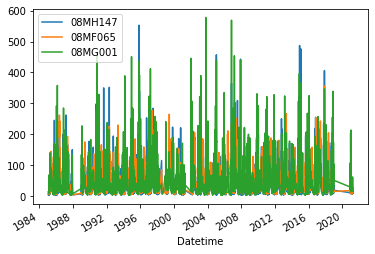

In [68]:
lt_df.plot()

Find the long-term mean annual discharge (**MAD**) for these three sites.


In [69]:
lt_df.mean()

08MH147    34.173399
08MF065    35.585335
08MG001    38.350901
dtype: float64

These mean annual flow numbers look pretty similar.  

>So can we just use this number for our basin and calculate energy?



### Unit-Area Runoff

**How do the three stations compare on a unit-area basis?**

Unit area runoff is commonly expressed in $\frac{L}{s \cdot km^2}$ or $mm$.

$$1 \frac{ \so{m^3} }{s} \cdot 1000 \frac{L}{m^3} \div A km^2 = UR \frac{L}{s\cdot km^2}$$

In [73]:
stn_das = {'08MF065': 712,
          '08MH147': 290,
          '08MG001': 383}

# make a copy of the flow dataframe
lt_ur = lt_df.copy()
for stn in station_list:
    lt_ur[stn] = 1000 * lt_ur[stn] / stn_das[stn]

In [74]:
lt_ur.head()

,08MH147,08MF065,08MG001
Datetime,,,
1985-01-28,13.620690,9.508427,35.509139
1985-02-04,10.000000,8.426966,19.843342
1985-02-05,10.206897,8.960674,21.227154
1985-02-06,9.620690,8.581461,20.496083
1985-02-07,10.206897,8.553371,20.887728


In [75]:
# re-calculate the mean on a unit-area basis
lt_ur.mean()

08MH147    117.839307
08MF065     49.979403
08MG001    100.132902
dtype: float64